# Mount Google Drive

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [128]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# Set the directory paths

In [130]:
train_dir = '/content/drive/MyDrive/lung cancer detection/Data/train'
val_dir = '/content/drive/MyDrive/lung cancer detection/Data/valid'
test_dir = '/content/drive/MyDrive/lung cancer detection/Data/test'

# Define image dimensions and batch size

In [131]:
img_width, img_height = 256, 256
batch_size = 32

# Create data generators for training and validation

In [132]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')           # Use subset='training' for training set

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')         # Use subset='validation' for validation set

Found 491 images belonging to 4 classes.
Found 122 images belonging to 4 classes.


# Print class labels

In [133]:
class_labels = train_generator.class_indices
print("Class labels:", class_labels)

Class labels: {'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1, 'normal': 2, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}


# Display some sample images from the training set

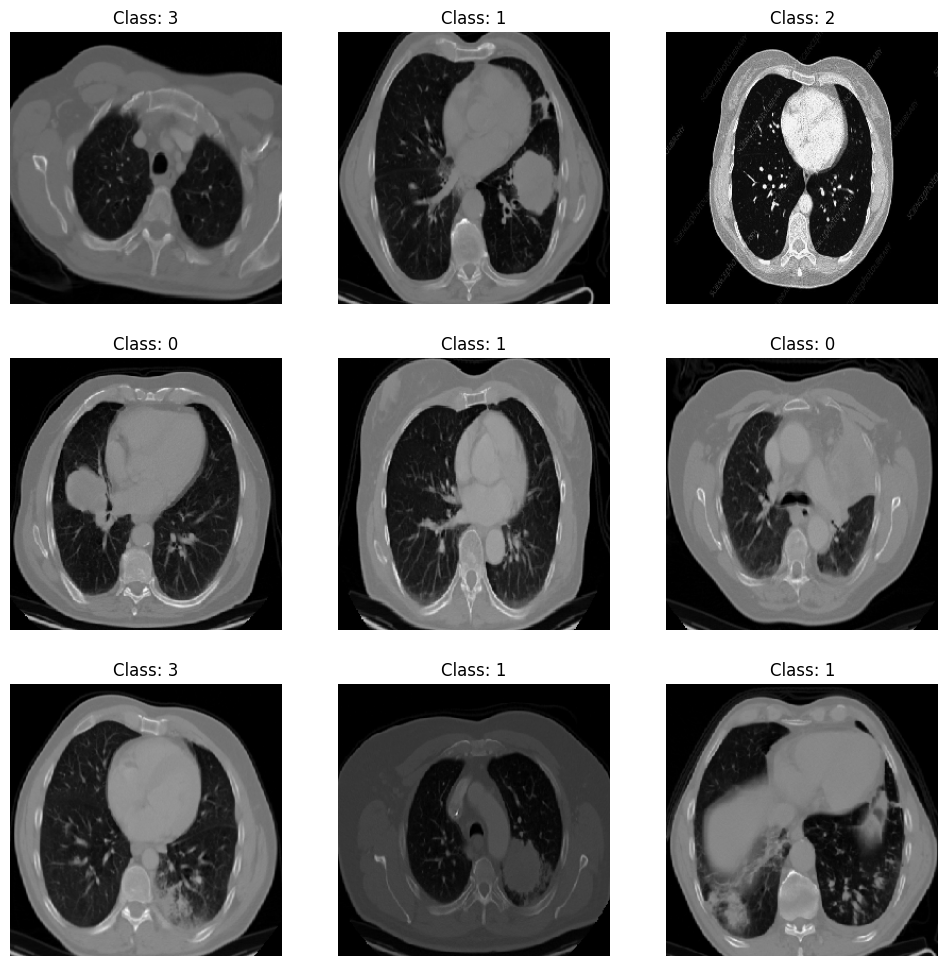

In [134]:
def display_sample_images(generator):
    x, y = next(generator)    # Get a batch of images and labels
    plt.figure(figsize=(12, 12))
    for i in range(9):        # Display 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(x[i])
        plt.title(f'Class: {np.argmax(y[i])}')
        plt.axis('off')
    plt.show()

display_sample_images(train_generator)

# Build the model

In [135]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(class_labels), activation='softmax')  # Output classes based on the number of labels
])

# Model Architecture

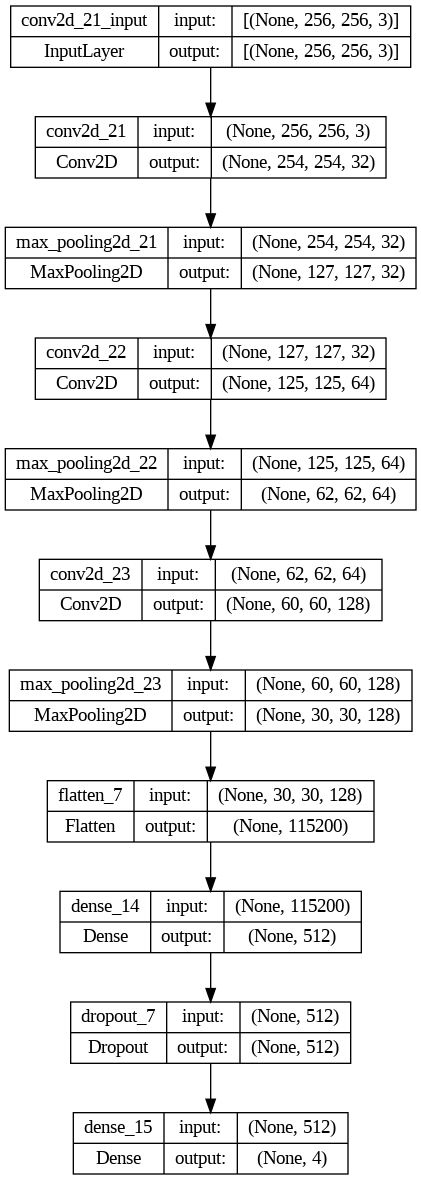

In [136]:
plot_model(model,show_shapes=True,show_layer_names=True)

# Compile the model

In [137]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [138]:
history = model.fit(train_generator,
                    epochs=10,
                    batch_size=batch_size,
                    validation_data=val_generator)

Epoch 1/10
16/16 [==============================] - 95s 6s/step - loss: 2.3020 - accuracy: 0.3747 - val_loss: 1.0190 - val_accuracy: 0.5656
Epoch 2/10
16/16 [==============================] - 92s 6s/step - loss: 0.8685 - accuracy: 0.6110 - val_loss: 0.7119 - val_accuracy: 0.7377
Epoch 3/10
16/16 [==============================] - 98s 6s/step - loss: 0.5213 - accuracy: 0.7984 - val_loss: 0.4905 - val_accuracy: 0.7869
Epoch 4/10
16/16 [==============================] - 105s 7s/step - loss: 0.3067 - accuracy: 0.8982 - val_loss: 0.3883 - val_accuracy: 0.8607
Epoch 5/10
16/16 [==============================] - 94s 6s/step - loss: 0.1638 - accuracy: 0.9470 - val_loss: 0.4661 - val_accuracy: 0.8525
Epoch 6/10
16/16 [==============================] - 93s 6s/step - loss: 0.1660 - accuracy: 0.9511 - val_loss: 0.3829 - val_accuracy: 0.8443
Epoch 7/10
16/16 [==============================] - 103s 7s/step - loss: 0.1679 - accuracy: 0.9695 - val_loss: 0.4039 - val_accuracy: 0.9016
Epoch 8/10
16/16 [

# Evaluate the model on the validation set

In [139]:
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation accuracy: {val_acc}')

4/4 [==============================] - 8s 2s/step - loss: 0.4033 - accuracy: 0.8852
Validation accuracy: 0.8852459192276001


# Plot training history

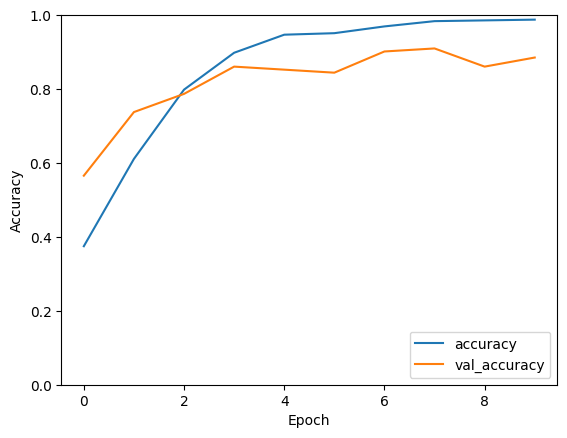

In [140]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Model and image dimensions

In [141]:
img_width, img_height = 256, 256

# Predictions

In [142]:
predictions = model.predict(val_generator)

4/4 [==============================] - 7s 1s/step


# Predicted Class Indices

In [143]:
predicted_classes = np.argmax(predictions,axis=1)
print("Predicted Class Indices:", predicted_classes[:10])

Predicted Class Indices: [1 0 0 1 2 2 2 3 2 0]


# Predicted Class Labels

In [144]:
class_labels=["squamous.cell.carcinoma","normal","large.cell.carcinoma","adenocarcinoma"]
predicted_labels=[class_labels[i] for i in predicted_classes]
print("Predicted Class Labels:", predicted_labels[:10])

Predicted Class Labels: ['normal', 'squamous.cell.carcinoma', 'squamous.cell.carcinoma', 'normal', 'large.cell.carcinoma', 'large.cell.carcinoma', 'large.cell.carcinoma', 'adenocarcinoma', 'large.cell.carcinoma', 'squamous.cell.carcinoma']


# Function to make predictions on a single image and display the image

In [145]:
def predict_and_display_image(img_path):
    print(f'Predicting for image: {img_path}')  # Debug statement
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_labels[predicted_class]
    confidence = prediction[0][predicted_class]

    plt.imshow(image.load_img(img_path))
    plt.title(f'Predicted: {predicted_label}, Confidence: {confidence:.2f}')
    plt.axis('off')
    plt.show()
    return predicted_label, confidence

# Test the function with an image

Predicting for image: /content/drive/MyDrive/lung cancer detection/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000108 (8).png
1/1 [==============================] - 0s 171ms/step


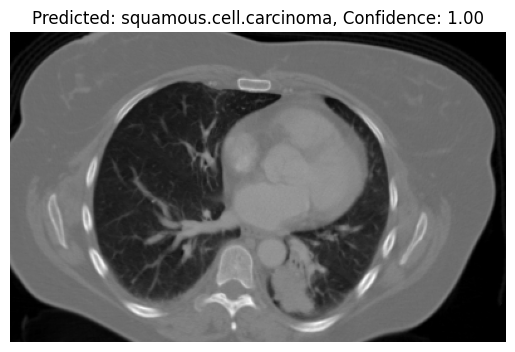

Predicted class: squamous.cell.carcinoma, Confidence: 0.9961280226707458


In [155]:
val_img_path = '/content/drive/MyDrive/lung cancer detection/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000108 (8).png'
predicted_class, confidence = predict_and_display_image(val_img_path)
print(f'Predicted class: {predicted_class}, Confidence: {confidence}')

# Function to predict and display images in a directory

In [147]:
def predict_and_display_images_in_directory(directory_path):
    if not os.path.exists(directory_path):
        print(f'Directory does not exist: {directory_path}')  # Debug statement
        return

    for filename in os.listdir(directory_path):
        print(f'Found file: {filename}')                      # Debug statement
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(directory_path, filename)
            predict_and_display_image(img_path)

# Predict a single image from the validation generator

1/1 [==============================] - 0s 138ms/step


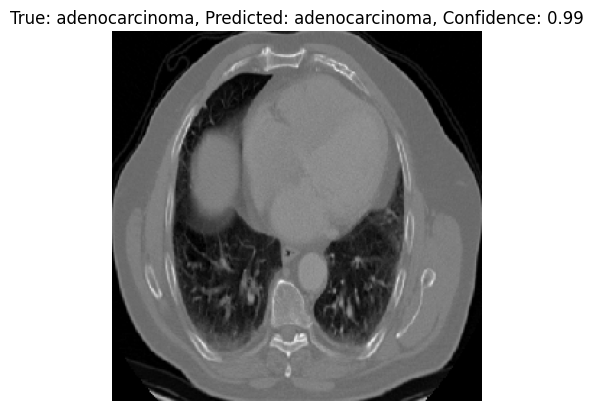

In [148]:
index = 0
x_val, y_val = next(val_generator)
image_to_predict = np.expand_dims(x_val[index], axis=0)
true_label = np.argmax(y_val[index])

predictions = model.predict(image_to_predict)
predicted_class = np.argmax(predictions, axis=1)[0]
predicted_label = class_labels[predicted_class]
confidence = predictions[0][predicted_class]

plt.imshow(x_val[index])
plt.title(f'True: {class_labels[true_label]}, Predicted: {predicted_label}, Confidence: {confidence:.2f}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 136ms/step


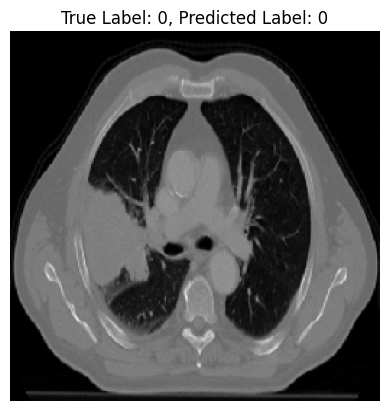

In [151]:
# Assuming val_generator is a Keras ImageDataGenerator
# Fetch a batch of images and labels
images, labels = next(val_generator)

# Select the first image and its label
image_to_predict = images[0]
true_label = np.argmax(labels[0])

# Expand dimensions to add batch size dimension
image_to_predict = np.expand_dims(image_to_predict, axis=0)

# Make prediction
predictions = model.predict(image_to_predict)
predicted_class = np.argmax(predictions)

# Display the image with true and predicted labels
plt.imshow(images[0])  # No need to reshape if the image is already (256, 256, 3)
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_class}")
plt.axis('off')
plt.show()


# Predict and display sample images from the test directory

In [150]:
predict_and_display_images_in_directory(val_dir)

Found file: large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
Found file: squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa
Found file: normal
Found file: adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
